In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
import pandas as pd
import numpy as np
import warnings
from sklearn import model_selection # for train test split
from sklearn import preprocessing # for scaling
from oauth2client.client import GoogleCredentials



In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
downloaded = drive.CreateFile({'id':'1ZqcQRS8e7vQcGdIjwKcWdQh731WrfLy5'}) # replace the id with id of file you want to access
downloaded.GetContentFile('shopintention.csv')

In [ ]:
df=pd.read_csv("shopintention.csv")

In [ ]:
df.head(10) #peek at the dataset

Administrative  Administrative_Duration  ...  Weekend  Revenue
0             0.0                      0.0  ...    False    False
1             0.0                      0.0  ...    False    False
2             0.0                     -1.0  ...    False    False
3             0.0                      0.0  ...    False    False
4             0.0                      0.0  ...     True    False
5             0.0                      0.0  ...    False    False
6             0.0                     -1.0  ...    False    False
7             1.0                     -1.0  ...     True    False
8             0.0                      0.0  ...    False    False
9             0.0                      0.0  ...    False    False

[10 rows x 18 columns]

In [ ]:
#renaming the columns
names=["admin","admin_dur","info","info_dur","prodrel","prodrel_dur","brate","erate","pagev","sday","month","os","browser","region","ttype","vtype","weekend","revenue"]


In [ ]:
df.columns=names
index=df.columns[df.isna().any(axis=0)]
dict={}
for i in index:
    temp=df[i].isna().astype(int).sum()
    dict[i]=[temp/df.shape[0],temp]

In [ ]:
dict

{'admin': [0.0011354420113544202, 14],
 'admin_dur': [0.0011354420113544202, 14],
 'brate': [0.0011354420113544202, 14],
 'erate': [0.0011354420113544202, 14],
 'info': [0.0011354420113544202, 14],
 'info_dur': [0.0011354420113544202, 14],
 'prodrel': [0.0011354420113544202, 14],
 'prodrel_dur': [0.0011354420113544202, 14]}

In [ ]:
df.loc[df.isna().any(axis=1)]# checking the total number of rows affected by missing values

admin  admin_dur  info  ...              vtype  weekend  revenue
1065    NaN        NaN   NaN  ...  Returning_Visitor    False    False
1132    NaN        NaN   NaN  ...  Returning_Visitor    False    False
1133    NaN        NaN   NaN  ...  Returning_Visitor    False    False
1134    NaN        NaN   NaN  ...  Returning_Visitor    False    False
1135    NaN        NaN   NaN  ...  Returning_Visitor    False    False
1136    NaN        NaN   NaN  ...  Returning_Visitor    False    False
1473    NaN        NaN   NaN  ...  Returning_Visitor     True    False
1474    NaN        NaN   NaN  ...  Returning_Visitor     True    False
1475    NaN        NaN   NaN  ...  Returning_Visitor    False    False
1476    NaN        NaN   NaN  ...  Returning_Visitor    False    False
2037    NaN        NaN   NaN  ...  Returning_Visitor    False    False
2038    NaN        NaN   NaN  ...  Returning_Visitor    False    False
2039    NaN        NaN   NaN  ...  Returning_Visitor     True    False
2753    NaN        NaN   NaN  ...  Returning_Visitor    False    False

[14 rows x 18 columns]

In [ ]:
cont=[]
for i in list(df.columns):
    print(i)
    print(len(df[i].unique()),"#######",df[i].unique())
    if len(df[i].unique())>20:
       cont.append(i)    ### making a list of continous variables
    print("===============================================================")

admin
28 ####### [ 0.  1.  2.  4. 12.  3. 10.  6.  5.  9.  8. 16. 13. 11.  7. 18. 14. 17.
 19. 15. nan 24. 22. 21. 20. 23. 27. 26.]
admin_dur
3337 ####### [  0.         -1.         53.        ... 167.9107143 305.125
 150.3571429]
info
18 ####### [ 0.  1.  2.  4. 16.  5.  3. 14.  6. 12.  7. nan  9. 10.  8. 11. 24. 13.]
info_dur
1260 ####### [  0.    -1.   120.   ... 547.75 368.25 211.25]
prodrel
312 ####### [  1.   2.  10.  19.   3.  16.   7.   6.  23.  13.  20.   8.   5.  32.
   4.  45.  14.  52.   9.  46.  15.  22.  11.  12.  36.  42.  27.  90.
  18.  38.  17. 128.  25.  30.  21.  51.  26.  28.  31.  24.  50.  96.
  49.  68.  98.  67.  55.  35.  37.  29.  34.  71.  63.  87.  40.  33.
  54.  64.  75.  39. 111.  81.  61.  47.  44.  88. 149.  41.   0.  79.
  66.  43. 258.  80.  62.  83. 173.  48.  58.  57.  56.  69.  82.  59.
 109. 287.  53.  84.  78. 137. 113.  89.  65.  60.  nan 104. 129.  77.
  74.  93.  76.  72. 194. 140. 110. 132. 115.  73. 328. 160.  86. 150.
  95. 130. 151. 117. 1

In [ ]:
df["revenue"]=df["revenue"].replace({False:0,True:1})#replacing True/False with 1/0 in the target variable
df["revenue"].value_counts()/df.shape[0]

0    0.845255
1    0.154745
Name: revenue, dtype: float64

In [ ]:
cont.append('info')
cat=[]
for i in list(df.columns):
    if i not in cont:
        cat.append(i)#amking a list of categorical random variables
cat=cat[:-1]

In [ ]:
print(cat)

['sday', 'month', 'os', 'browser', 'region', 'ttype', 'vtype', 'weekend']


In [ ]:
print(cont)

['admin', 'admin_dur', 'info_dur', 'prodrel', 'prodrel_dur', 'brate', 'erate', 'pagev', 'info']


In [ ]:
### Dropping the missing values 
df1=df
df1=df1.dropna()

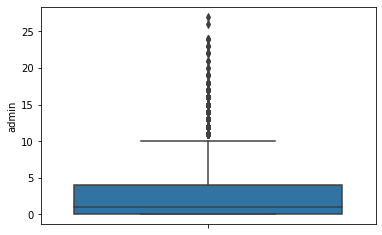

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(y=cont[0],data=df1)

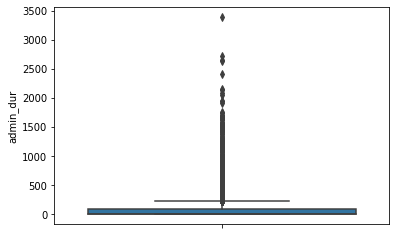

In [ ]:
sns.boxplot(y=cont[1],data=df1)

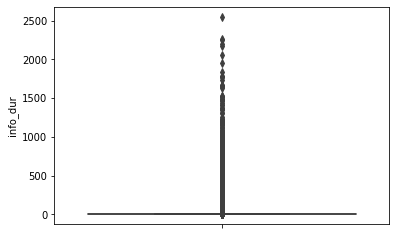

In [ ]:
sns.boxplot(y=cont[2],data=df1)

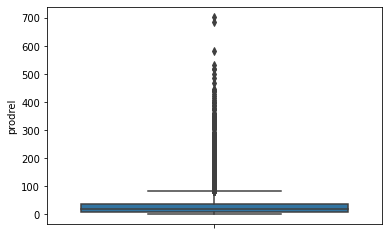

In [ ]:
sns.boxplot(y=cont[3],data=df1)

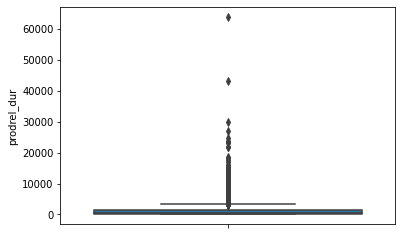

In [ ]:
sns.boxplot(y=cont[4],data=df1)

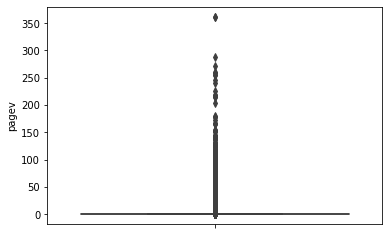

In [ ]:
sns.boxplot(y=cont[7],data=df1)

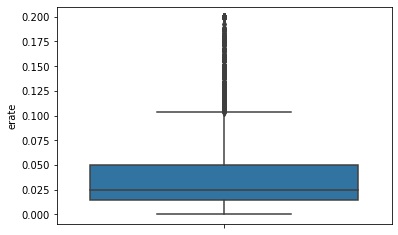

In [ ]:
sns.boxplot(y=cont[6],data=df1)

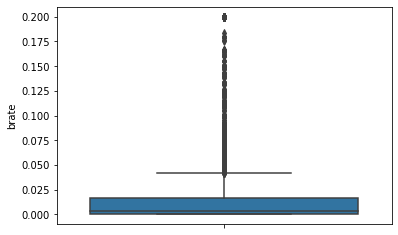

In [ ]:
sns.boxplot(y=cont[5],data=df1)

In [ ]:
df1.shape#shape of the daaset after dropping missing values

(12316, 18)

In [ ]:
'''X_train=df1.iloc[:,:-1]
#X_train=pd.get_dummies(X_train,columns=cat,drop_first=True)

y_train=df1['revenue']


X_train.loc[X_train.isna().any(axis=1)]

from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy=0.7,random_state=10)
X_train, y_train = smote.fit_resample(X_train, y_train)

X_train.loc[X_train.isna().any(axis=1)]

X_train.shape

y_train.shape

type(y_train)

X_train.loc[y_train==0].shape[0]/X_train.shape[0]

X_train.loc[y_train==1].shape[0]

from imblearn.combine import SMOTETomek
smk = SMOTETomek()
X_res,y_res=smk.fit_resample(X_train,y_train)

X_train.loc[y_train==0].shape[0]

X_train.loc[y_train==1].shape[0]

from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train)


X_tl.loc[y_tl==0].shape[0]/X_tl.shape[0]

X_tl.loc[y_tl==1].shape[0]/X_tl.shape[0]'''

"X_train=df1.iloc[:,:-1]\n#X_train=pd.get_dummies(X_train,columns=cat,drop_first=True)\n\ny_train=df1['revenue']\n\n\nX_train.loc[X_train.isna().any(axis=1)]\n\nfrom imblearn.over_sampling import SMOTE\nsmote=SMOTE(sampling_strategy=0.7,random_state=10)\nX_train, y_train = smote.fit_resample(X_train, y_train)\n\nX_train.loc[X_train.isna().any(axis=1)]\n\nX_train.shape\n\ny_train.shape\n\ntype(y_train)\n\nX_train.loc[y_train==0].shape[0]/X_train.shape[0]\n\nX_train.loc[y_train==1].shape[0]\n\nfrom imblearn.combine import SMOTETomek\nsmk = SMOTETomek()\nX_res,y_res=smk.fit_resample(X_train,y_train)\n\nX_train.loc[y_train==0].shape[0]\n\nX_train.loc[y_train==1].shape[0]\n\nfrom imblearn.under_sampling import TomekLinks\n\ntl = TomekLinks()\nX_tl, y_tl = tl.fit_resample(X_train, y_train)\n\n\nX_tl.loc[y_tl==0].shape[0]/X_tl.shape[0]\n\nX_tl.loc[y_tl==1].shape[0]/X_tl.shape[0]"

In [ ]:
X=df1.iloc[:,:-1]
X=pd.get_dummies(X,columns=cat,drop_first=True)#one hot encoding of categorical random variables
y=df1['revenue']
#Splitting the dataset into train and test
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=20)

In [ ]:
Xtrain.shape

(9852, 72)

In [ ]:
X

admin  admin_dur  ...  vtype_Returning_Visitor  weekend_True
0        0.0        0.0  ...                        1             0
1        0.0        0.0  ...                        1             0
2        0.0       -1.0  ...                        1             0
3        0.0        0.0  ...                        1             0
4        0.0        0.0  ...                        1             1
...      ...        ...  ...                      ...           ...
12325    3.0      145.0  ...                        1             1
12326    0.0        0.0  ...                        1             1
12327    0.0        0.0  ...                        1             1
12328    4.0       75.0  ...                        1             0
12329    0.0        0.0  ...                        0             1

[12316 rows x 72 columns]

In [ ]:
#SCALING THE TEST AND TRAIN DATA
scaler=preprocessing.StandardScaler()
scaler.fit(Xtrain[cont]) # fit is called only on training data 
Xtrain[cont]=scaler.transform(Xtrain[cont])
Xtest[cont]=scaler.transform(Xtest[cont])

In [ ]:
print(Xtrain.shape[0],ytrain.shape[0],"====",Xtest.shape[0],ytest.shape[0])

9852 9852 ==== 2464 2464


In [ ]:
for i in list(Xtrain.columns):
    print(i)
    print(len(Xtrain[i].unique()),"#######",Xtrain[i].unique())
      
    print("===============================================================")

admin
27 ####### [-0.69253245 -0.08956928  2.0208018   0.51339388  1.11635705  1.71932022
  3.22672814 -0.39105087  0.2119123   0.81487547  2.92524655  2.32228339
  1.41783863  6.54302556  2.62376497  4.43265447  3.52820972  7.44747031
  4.13117289  3.8296913   5.33709922  5.03561764  4.73413606  5.94006239
  5.63858081  7.14598873  6.24154397]
admin_dur
2786 ####### [-0.45294348 -0.43039394  4.64654003 ...  0.09858058 -0.23684376
  0.78145568]
info
14 ####### [-0.40218762  2.8396634   1.21873789  0.40827514  4.4605889   2.02920064
  3.65012615  6.89197717  6.08151441  5.27105166  9.32336543  7.70243992
 10.94429093 19.04891847]
info_dur
1064 ####### [-0.24684203  0.38213372  0.07957253 ... -0.11690392 -0.13573553
  8.41569815]
prodrel
281 ####### [ 1.05845669e-01 -4.91755774e-01  2.31237408e+00 -4.45786432e-01
 -5.60709787e-01  5.98763275e-02  4.73600404e-01  3.81661720e-01
  8.41355138e-01 -4.68771103e-01 -3.76832420e-01  2.43753695e-01
  5.65539087e-01 -2.61909065e-01  3.35692378e-0

In [ ]:
#RESAMPLING TO 70:30 FROM 85:15
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
count_class_0 = int(Xtrain.loc[ytrain==0].shape[0]/1)
count_class_1 = int((count_class_0)*(30/70))
pipe = make_pipeline(SMOTE(sampling_strategy={1: count_class_1}),NearMiss(sampling_strategy={0: count_class_0}))
X_smt,y_smt = pipe.fit_resample(Xtrain,ytrain)

In [ ]:
X_smt.loc[y_smt==0].shape[0]/X_smt.shape[0]

0.7

In [ ]:
X_smt.loc[y_smt==1].shape[0]/X_smt.shape[0]

0.3

In [ ]:
from sklearn import neighbors
model=neighbors.KNeighborsClassifier(n_neighbors=7)

In [ ]:
model.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
trainpred=model.predict(Xtrain)
testpred=model.predict(Xtest)

In [ ]:
from sklearn import metrics
def printresults(actual,predicted):
    print("AUC : ",np.round( metrics.roc_auc_score(actual,predicted),4)  )
    print("accuracy : ",np.round( metrics.accuracy_score(actual,predicted),4)  )
    print("recall: ",np.round( metrics.recall_score(actual,predicted),4)  )
    print("precision : ",np.round( metrics.precision_score(actual,predicted),4)  )
    print("f1 : ",np.round( metrics.f1_score(actual,predicted),4)  )
printresults(ytrain,trainpred)

AUC :  0.7211
accuracy :  0.8981
recall:  0.4634
precision :  0.8025
f1 :  0.5875


In [ ]:
printresults(ytest,testpred)

AUC :  0.6584
accuracy :  0.873
recall:  0.3534
precision :  0.6262
f1 :  0.4518


In [ ]:
model=neighbors.KNeighborsClassifier(n_neighbors=10)

In [ ]:
model.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
trainpred=model.predict(Xtrain)
testpred=model.predict(Xtest)

In [ ]:
printresults(ytrain,trainpred)

AUC :  0.68
accuracy :  0.8884
recall:  0.3765
precision :  0.8092
f1 :  0.5139


In [ ]:
printresults(ytest,testpred)

AUC :  0.642
accuracy :  0.8778
recall:  0.3068
precision :  0.7
f1 :  0.4267


In [ ]:
model=neighbors.KNeighborsClassifier(n_neighbors=5)
model.fit(Xtrain,ytrain)

KNeighborsClassifier()